In [1]:
# Task 5: Decision Trees and Random Forests - Elevate Labs AI & ML Internship

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn import tree

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-dataset


In [8]:
#  Load dataset (Heart Disease dataset or any relevant classification dataset)
import os

file_name = "heart.csv" # Adjust this if your dataset file has a different name
dataset_file_path = os.path.join(path, file_name)

df = pd.read_csv(dataset_file_path)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
# Preprocessing
X = df.drop("target", axis=1)
y = df["target"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
#  Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

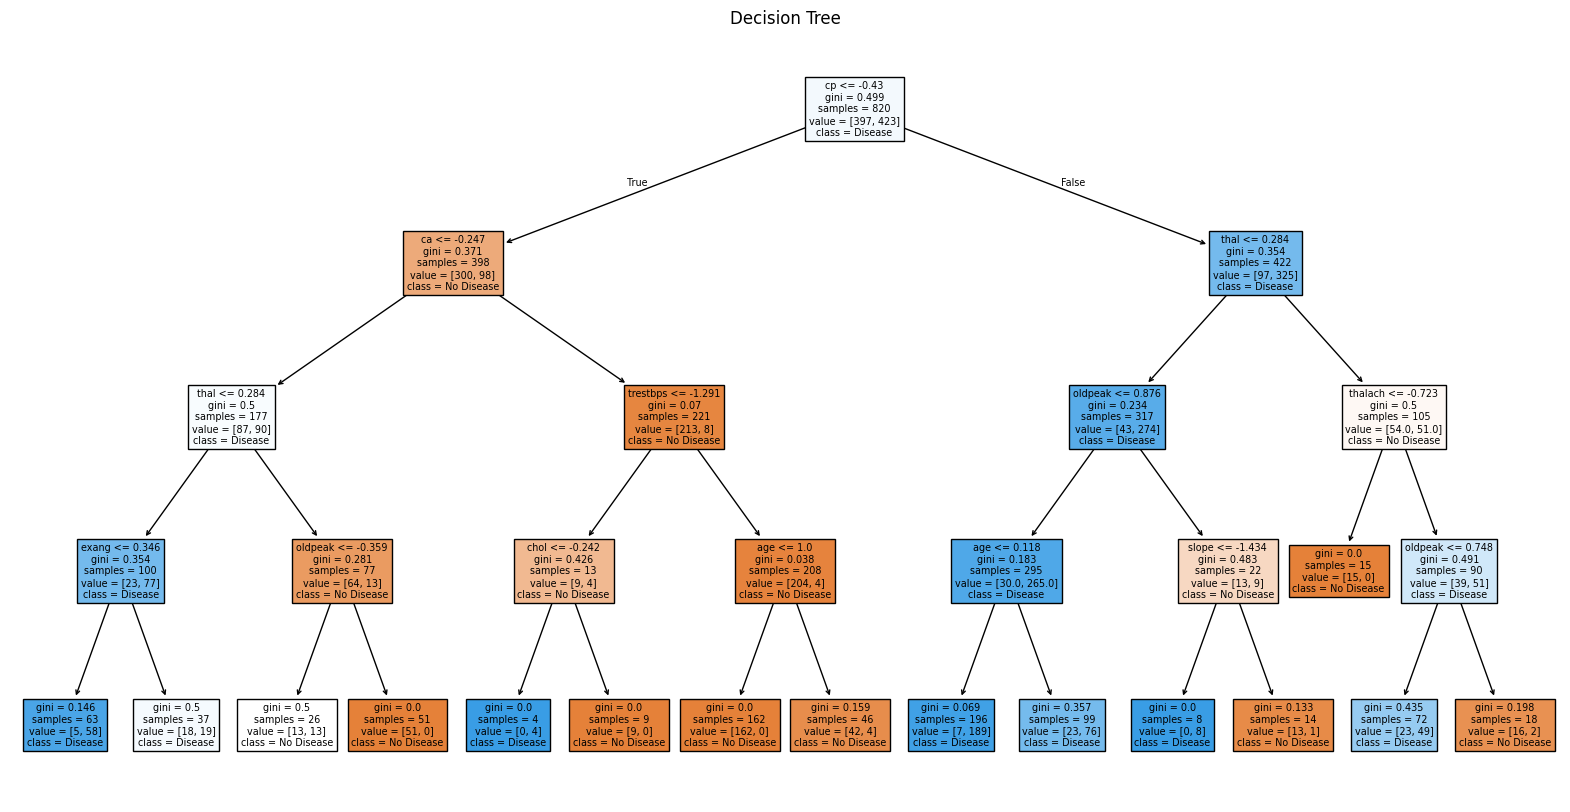

In [12]:
#  Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree")
plt.show()

In [13]:
#  Decision Tree Evaluation
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

Confusion Matrix:
 [[71 31]
 [10 93]]


In [14]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
#  Random Forest Evaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Confusion Matrix:
 [[102   0]
 [  3 100]]


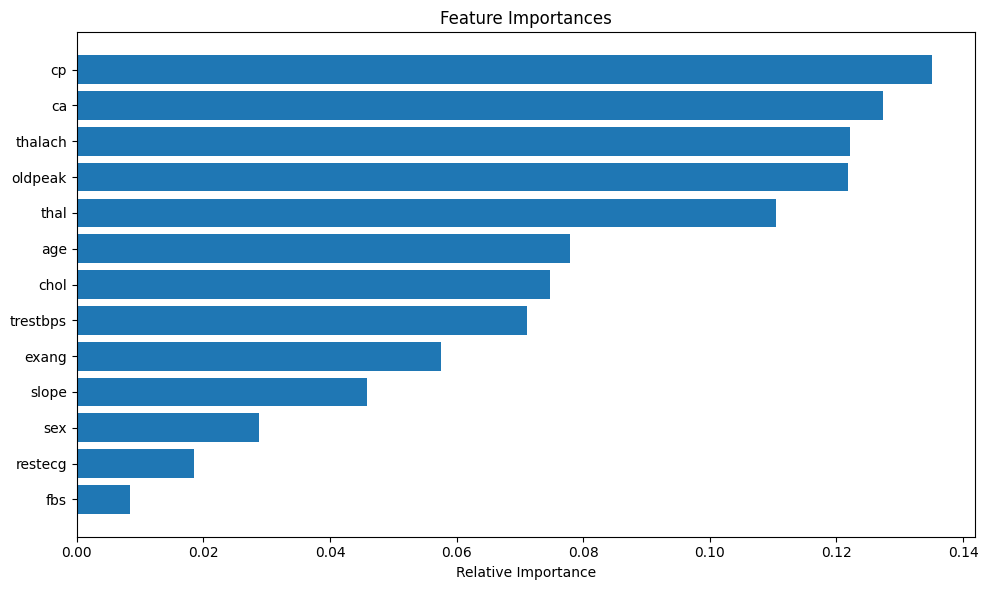

In [16]:
#  Feature Importances
importances = rf_model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [17]:
# Cross-Validation Accuracy
dt_cv_score = cross_val_score(dt_model, X_scaled, y, cv=5)
rf_cv_score = cross_val_score(rf_model, X_scaled, y, cv=5)

print("Decision Tree Cross-Validation Accuracy:", dt_cv_score.mean())
print("Random Forest Cross-Validation Accuracy:", rf_cv_score.mean())

Decision Tree Cross-Validation Accuracy: 0.8341463414634147
Random Forest Cross-Validation Accuracy: 0.9970731707317073
